## Project Neural Network - Predict The Onset Of Diabetes For Pima Indian

### Import the libraries

In [1]:
import pandas as pd

### Load the dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Check for missing values

In [3]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X, y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

### Splitting dataset into train/test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)
X_train, X_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 54             7      150             66             42      342  34.7   
 159           17      163             72             41      114  40.9   
 30             5      109             75             26        0  36.0   
 622            6      183             94              0        0  40.8   
 462            8       74             70             40       49  35.3   
 ..           ...      ...            ...            ...      ...   ...   
 84             5      137            108              0        0  48.8   
 223            7      142             60             33      190  28.8   
 36            11      138             76              0        0  33.2   
 457            5       86             68             28       71  30.2   
 242            3      139             54              0        0  25.6   
 
      DiabetesPedigreeFunction  Age  
 54                      0.718   42  
 159                  

In [9]:
y_train, y_test

(54     0
 159    1
 30     0
 622    0
 462    0
       ..
 84     1
 223    0
 36     0
 457    0
 242    1
 Name: Outcome, Length: 614, dtype: int64,
 511    0
 707    0
 596    0
 595    1
 283    1
       ..
 385    0
 383    0
 481    0
 136    0
 394    1
 Name: Outcome, Length: 154, dtype: int64)

### Define the keras model

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

In [17]:
model = Sequential()

In [18]:
model.add(Input(shape=(8,))) 
model.add(Dense(24, activation='relu', kernel_initializer='RandomNormal'))
model.add(Dense(12, activation='relu', kernel_initializer='RandomNormal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='RandomNormal'))

### Compile the model (Fit and Train)

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=160, batch_size=10)

Epoch 1/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.6482 - loss: 0.6829 
Epoch 2/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.6515 - loss: 0.6678
Epoch 3/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.6515 - loss: 0.6579
Epoch 4/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.6515 - loss: 0.6465
Epoch 5/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.6515 - loss: 0.6360
Epoch 6/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.6596 - loss: 0.6220
Epoch 7/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6629 - loss: 0.6122
Epoch 8/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.6710 - loss: 0.6113
Epoch 9/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.6954 - loss: 0.5966
Epoch 10/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.6987 - loss: 0.5929
Epoch 11/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.6840 - loss: 0.5988
Epoch 12/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.7573 - loss: 0.5150
Epoch 69/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.7557 - loss: 0.5181
Epoch 70/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.7557 - loss: 0.5104
Epoch 71/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.7459 - loss: 0.5077
Epoch 72/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.7410 - loss: 0.5159
Epoch 73/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.7524 - loss: 0.5282
Epoch 74/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.7573 - loss: 0.5122
Epoch 75/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.7687 - loss: 0.5027
Epoch 76/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.7524 - loss: 0.5049
Epoch 77/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7541 - loss: 0.5087
Epoch 78/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.7492 - loss: 0.5060
Epoch 79/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 574u

Epoch 135/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.7704 - loss: 0.4599
Epoch 136/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.7752 - loss: 0.4612
Epoch 137/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.7752 - loss: 0.4756
Epoch 138/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.7785 - loss: 0.4754
Epoch 139/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.7736 - loss: 0.4607
Epoch 140/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.7769 - loss: 0.4546
Epoch 141/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.7850 - loss: 0.4550
Epoch 142/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.7818 - loss: 0.4664
Epoch 143/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.7915 - loss: 0.4544
Epoch 144/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.7899 - loss: 0.4523
Epoch 145/160
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.7655 - loss: 0.4634
Epoch 146/160
62/62 ━

### Prediction through neural network

In [21]:
accuracy_test = model.evaluate(X_test, y_test)
accuracy_test

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7208 - loss: 0.5238 


[0.5237714052200317, 0.7207792401313782]

In [22]:
y_pred_prob = model.predict(X_test)
y_pred_prob

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[0.06718545],
       [0.26099035],
       [0.2284683 ],
       [0.08283833],
       [0.6642574 ],
       [0.2771776 ],
       [0.49795434],
       [0.6439794 ],
       [0.54315645],
       [0.65274984],
       [0.44810042],
       [0.12053978],
       [0.06313538],
       [0.1579376 ],
       [0.3235518 ],
       [0.8976392 ],
       [0.00864278],
       [0.5432739 ],
       [0.64603984],
       [0.5772968 ],
       [0.41967517],
       [0.61398715],
       [0.16158842],
       [0.2784833 ],
       [0.09212487],
       [0.9442179 ],
       [0.2576078 ],
       [0.35298488],
       [0.27815607],
       [0.9405621 ],
       [0.95445484],
       [0.04740392],
       [0.8523898 ],
       [0.2090477 ],
       [0.9370022 ],
       [0.17967835],
       [0.34263036],
       [0.7442047 ],
       [0.05428163],
       [0.7697208 ],
       [0.57818615],
       [0.259642  ],
       [0.5172029 ],
       [0.90515596],
       [0.81141275],
       [0.62826043],
       [0.23355164],
       [0.928

In [23]:
y_pred = (y_pred_prob > 0.5).astype('int32')
y_pred

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

### Evaluate the classification matrix

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[80, 20],
       [23, 31]])

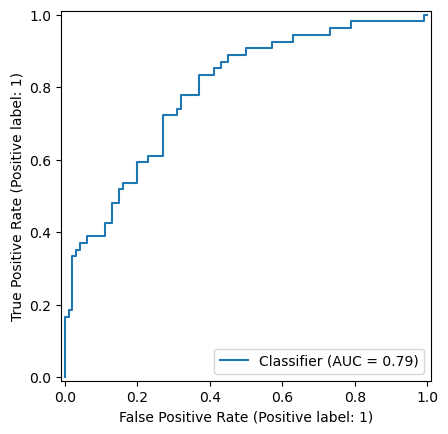

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.show()